# Homework 8

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date:** Saturday, November 3rd, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators

** Place the name of everyone who's submitting this assignment here**

<div class="answer-separator">
------------------------
</div>

In [2]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm

import pandas as pd
import seaborn as sns

from sklearn import model_selection
from sklearn import linear_model

import torch 
import torch.nn as nn 
from torch.autograd import Variable 
from matplotlib import colors

%matplotlib inline

## Question 1: In the AM207 Nursery We Help Canadians Smoke Trees with Purple Stuff

**Some coding required**

**This is part 1 of a 2 part problem.  You'll see the second part in a later problem set...**

A plant nursery in Cambridge is exprimentally cross-breeding two types of hibiscus flowers: blue and pink. The goal is to create an exotic flower whose petals are pink with a ring of blue on each. 

There are four types of child plant that can result from this cross-breeding: 

  - Type 1: blue petals
  - Type 2: pink petals 
  - Type 3: purple petals
  - Type 4: pink petals with a blue ring on each (the desired effect). 

Out of 197 initial cross-breedings, the nursery obtained the following distribution over the four types of child plants: 

$$Y = (y_1, y_2, y_3, y_4) = (125, 18, 20, 34)$$

where $y_i$ represents the number of child plants that are of type $i$.

The nursery then consulted a famed Harvard plant geneticist, who informed them that the probability of obtaining each type of child plant in any single breeding experiment is as follows:

$$ \frac{\theta+2}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4}.$$

Unfortunately, the geneticist was unable to specify the quantity $\theta$.

Clearly, the nursery is interested in understanding how many cross-breeding they must perform, on average, in order to obtain a certain number of child plants with the exotic blue rings. To do this they must be able to compute $\theta$. 

The owners of the nursery, being top students in AM207, decided to model the experiment in hopes of discovering $\theta$ using the results from their 197 initial experiments. 

They chose to model the observed data using a multinomial model and thus calculated the likelihood to be:

$$ p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4} $$


The nursery owners decided to augment their model and hopefully obtain a friendlier looking distribution that allows for easy EM based maximum-likelihood finding and sampling (which you will do in next week's homework).

They augment the data with a new variable $z$ such that:

$$z + (y_1 - z) = y_1.$$

That is, using the latent variable $z$, the number of type I child plants $y_1$ can be broken into two subtypes. Let the probability of obtaining the two subtype be $1/2$ and $\theta/4$, respectively. $y_1$ can now be interpreted as to be the total number of trials in a binomial trial. Thus, the new likelihood can be written as

$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

Treat the augmented model as a latent variable model.

Write down an expression (up to unimportant constants - you must decide what unimportant means) for each of the following:

1.1. The observed data log likelihood $\mathcal{l}(y \ \vert \ \theta)$

1.2. The complete data log likelihood $\mathcal{L}(y, z\ \vert \ \theta)$

1.3. The Auxilary function, $Q(\theta, \theta^{(t-1)})$, or the expected complete data log likelihood, defined by

$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\mathcal{L}(y, z\ \vert \ \theta)]$$

1.4. Find an expression for $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$ by maximizing the Auxilary function $Q(\theta, \theta^{(t-1)})$ given $\theta, \theta^{t-1}$ to find the optimal value for $\theta^{t}$.  

**Hint:** You don't actually need to do any difficult optimization for the M-step. After taking the expectation of the complete data log likelihood in the E-step, match your $Q(\theta, \theta^{(t-1)})$ to the log pdf of a familiar distribution, then use the known formula for the mode of this distribution to optimize $Q(\theta, \theta^{(t-1)})$.

1.5. Use your forumulas from 1.3 and 1.4 for $Q(\theta, \theta^{t-1})$ and $\theta^{t}$ to calculate the maximum likelihood through Expectation Maximization (EM). In order to perform EM, you must iterate through the following steps

- (Expectation) Compute the Auxilary function, $Q(\theta, \theta^{t-1})$ (the expectation of the full data likelihood)
- (Maximization) Compute $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$

Choose your own reasonable criterion for convergence to **estimate the MLE** of $\theta$ using EM.




**Gratuitous Titular Reference**:  Canada recently became the second country in the world to [legalize marijuana](https://www.cnn.com/2018/06/20/health/canada-legalizes-marijuana/index.html).  [Purple Stuff](https://www.amazon.com/Purple-Stuff-Soda-Relaxation-Beverage/dp/B00FF4AXTE) is a health beverage available on Amazon with a name and taste that's a tip of the hat to [Purple Drank](https://en.wikipedia.org/wiki/Purple_drank), the codeine infused beverage also popularly known as *lean* and is synonymous with the Houston hip hop scene (and in particular DJ Screw and his famous Chopped and Screwed style).

<div class="answer-separator">
------------------------
</div>

## Question 2: Predicting the Prior Like a Punch to the Kidneys 

**Some coding required**

In this problem we will work with the US Kidney Cancer Dataset (by county), a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

The kidney cancer data can be found [here](./kcancer.csv).

A casual inspection of the data might suggest that we independently model cancer rates for each of the provided counties.  Our experience in past homeworks/labs/lectures (in particular when we delved into the Rat Tumors problem) suggests potential drawbacks of conclusions based on raw cancer rates.  Addressing these drawbacks, let's look use a Bayesian model for our analysis of the data. In particular you will implement an Empircal Bayes model to examine the adjusted cancer rates per county.

Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-th county and $\theta_j$ the underlying kidney cancer rate for that county. We can construct a Bayesian model for our data as follows:
\begin{aligned}
y_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

2.1. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet. And, our data are on the scale of $y$, not the rates $\theta$. Write an expression for the negative binomial prior-predictive for this model.

**Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.

2.2. Implement Empirical Bayes via moment matching by matching the mean and the variance (central moments) of the negative binomial you calclated in 2.1 to the sample mean and variance from the data.  Find appropriate expressions/values for $\alpha$ and $\beta$. 

**Hint:** You need to be careful with the $5n_j$ multiplier.

2.3. Use the values of $\alpha$ and $\beta$ you derived in 2.2 to generate 5000 posterior samples for the kidney cancer rates for each county.  Use these samples to generate a posterior mean rate for each county.

2.4. Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

2.5. Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

**Hint:** You might also find it helpful to follow the Rat Tumor example.


**Gratuitous Pop Culture Bayesian Reference**: 

![](https://www.explainxkcd.com/wiki/images/b/bd/modified_bayes_theorem.png)

<div class="answer-separator">
------------------------
</div>

## Q2: Martin Garrix, Tiesto, Marshmello on the 1s and 2s.  Is that a Mixture of Experts?

**Some coding required**

What if you had to predict a one-to-many function? The data provided below comes from a dataset generated by Chris Bishop (yes that Bishop) to explain the models mentioned in the title above. We have included a pdf from his book which describe these models in some detail. This problem will continure in future homework where we shall learn to sample from this model and also how to solve it using mixture density networks.

We read this data in...

In [165]:
df = pd.read_csv("one-to-many.csv")
df.head()

,target,x
0,0.000000,0.018727
1,0.001001,0.050424
2,0.002002,0.042375
3,0.003003,0.038596
4,0.004004,0.019352


...and then plot it. Notice both the uneven sampling (more towards the center), and the "more than one y" for a given x.

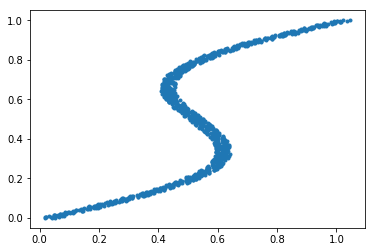

In [166]:
plt.plot(df.x, df.target, '.');

In [167]:
x=df.x
y=df.target
x_data, x_test_data, y_data, y_test_data = model_selection.train_test_split(x, y, test_size=0.30, random_state=42)


In [168]:
x_tensor = torch.from_numpy(np.float32(x_data).reshape(len(x_data), 1))
y_tensor = torch.from_numpy(np.float32(y_data).reshape(len(y_data), 1))



In [169]:
x_test_tensor = torch.from_numpy(np.float32(x_test_data).reshape(len(x_test_data), 1))
y_test_tensor=torch.from_numpy(np.float32(y_test_data).reshape(len(y_test_data), 1))
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)



Normal regression approaches to modeling such a function wont work, as they expect the function to be a proper mathematical function, that is, single valued.

These kind of problems are called **inverse problems**, where more than one input state leads to an output state, and we have to try and model these multiple input states.

A mixture of gaussians (or other distributions) might is a sensible way to do this.

You choose one of the gaussians with some probability. The nean of the gaussian is then given by some regression function, say for example a straight line. We could additionally fix the standard deviation or model it as well. 

Thus, for each component Gaussian, we choose a functional form for the mean and standard deviation. So our model looks something like this:

$$f(x)  = \sum_i \lambda_i g_i (x) $$

Say we fit a model with 3 gaussians to this data. Such a model cannot fit the function above. Notice for example that at $x=0.2$ only one of the gaussians will dominate, different from the situation at $x=0.5$. This means that the probabilities of "belonging" to one or the other gaussians is also changing with $x$.

If we allow the mixing probabilities to depend on $x$, we can model this situation.

$$f(x)  = \sum_i \lambda_i (x) g_i (x) $$

Such a model is called a "mixture of experts" model. The idea is that one "expert" gaussian is responsible in one sector of the feature space, while another expert is responsible in another sector.

You can think of this model as implementing a "standard" gaussian mixture at each "point" x, with the added complexity that all of the means, standard deviations, and mixture probabilities change from one x to another.

See https://www.cs.toronto.edu/~hinton/absps/hme.pdf and http://www.ee.hacettepe.edu.tr/~eyuksel/Publications/2012_TwentyYearsofMixtureofExperts.pdf for more details. I found the latter clearer and easier to understand.

For this entire question you might find diagram code from [here](https://github.com/hardmaru/pytorch_notebooks/blob/master/mixture_density_networks.ipynb) useful. Take with attribution.

We will assume we have **3 gaussians**.

### Iterative Linear Regression Mixture of Experts Model

The basic idea, illustrated below, is to fit piecewise linear regressions iteratively in a EM style algorithm.

![](https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjnsuyq59tar%2Fmixreg0.png)

The algorithm looks like this: 

- Initialize the 1000 points in this dataset as randomly belonging to one of 3 "classes" or "clusters" or "experts". This takes a x-data problem and augments it with a fake z data point that tells us whether the point belongs in cluster 0, 1, or 2. (It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2).

- With the fake z's in hand the 1000 points can be separated (based on cluster assignment) into 3 sets of points and used to fit 3 linear regression models. 

- Predictions can be made for all 1000 points on the data for each of the 3 regression lines. Reassign each data point to a cluster by choosing the cluster that minimizes the prediction error based on the squared distances between its actual y value and the 3 cluster predictions.

- Rinse and repeat.

3.1. We stated that "*It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2*".  Why might it help convergence to define an initial cluster assignment as opposed to random assignment?

3.2. Specify a potential convergence criterion to use.  Why might you choose it?

3.3. Implement the algorithm we described along with the convergence criterion you chose in 3.2.  You can use a linear regression fitter of your choice (statsmodels, sklearn, your own...).

3.4. Apply your algorithm in the data in the `df` dataframe to produce a diagram like the one above which illustrates the straight line fits as well as the cluster belonging. 


**3.1** We stated that "It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2". Why might it help convergence to define an initial cluster assignment as opposed to random assignment?



When we look at our data, the linear slope of the points below y=0.2 is fairly consistent (low positive), then the data inflects sharply and flattens out again to a fairly consitent linear slope at y=0.8.  From what we know about simple linear regression, if we are looking to capture all of our data by fitting just three lines, this (0<y<0.2),(0.2<y<.8) and (0.8<y1.0) split makes a lot of sense. In the first bucket we have data points that would neatly fit a regression line with moderately positive slope. In the second bucket we have points that would fit a steep-negative sloping regression line and in the third bucket with have another positively sloped line but with a higher intercept than the first line.   Had we randomly assigned the clusters, it would take a long time to re-sort allof the points into the best fitting buckets to get the 3 lines we are looking for (i.e. many more permutations of line regression fits to get to the same point where are starting now). This would be a very inefficint use of time. In a problem where we already have a defined number of clusters to work with (i.e. 3 Gaussians required in this question), if we can cut down computational time but pre-setting our clusters with values that make sense, we should absolutely do that. If one initiates a random clustering for the data points, they need to be willing to use more than 3 Gaussians (i.e. more than 3 lines) in order to obtain convergence (minimize the distance between expert and actual data points.)

**3.2**. Specify a potential convergence criterion to use. Why might you choose it?

For our linear regression models, I want to run log-cosh as our convergence criterion. It defined as the log of hyperbolic cosine of our predicted error. Its basically a play on mean squared error, which we are using for labeling/re-labeling our values, but it is smoother and less suseptible to extreme values. Here is the formula:


$$loss(y,\hat{y})=\sum_{n=i} log(cosh(\hat{y}-y_i)$$

In [170]:
# quick code for the logcosh function
def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

**IF** we were to run a neural network version of this analysis (as per link provided in the preface of this question), log likelihood for the difference between output distribution vs. actual training data is a good convergence criterion to use .  

$$loss(y | x) = -\log[ \sum_{k}^{K} \Pi_{k}(x) \phi(y, \mu_{k}(x), \sigma_{k}(x)) ]$$

Using the formula above,  we would compute a loss of the difference between our predicted distribution vs. the distribution in the training data for each of the x and ys in our training set. We will look to minimized the sum of all these costs. A simple convergence criterion is: stop iteration when the loss function does not change on a step.  This will occur when all of the points are assigned to the name cluster at step $t+1$ as they were at step $t$.

**3.3**. Implement the algorithm we described along with the convergence criterion you chose in 3.2. You can use a linear regression fitter of your choice (statsmodels, sklearn, your own...).

In [171]:
#first we define a function to assign data into bins
def assign_bins(df,bin):
    bin=bin
    category = pd.cut(df.target,bin)
    z=pd.DataFrame(pd.Categorical(category).codes)
    z=pd.DataFrame(z)
    z.index=y.index
    df_with_z=pd.merge(df,z,left_index=True,right_index=True)
    df_with_z.columns=['target','x','z']
    return df_with_z

In [172]:
#let's test it on our intial path
bin = [.2,.8,1.0]
df_with_z=assign_bins(df,bin)
display(df_with_z.describe())

,target,x,z
count,1000.000000,1000.000000,1000.000000
mean,0.500000,0.524513,0.000000
std,0.289109,0.182537,0.632772
min,0.000000,0.018727,-1.000000
25%,0.250000,0.438674,0.000000
50%,0.500000,0.526611,0.000000
75%,0.750000,0.605026,0.000000
max,1.000000,1.044624,1.000000


In [173]:
#split data into 3 groups
def group_by_bin(df_with_z):
    groups=df_with_z.groupby('z')
    first=groups.apply(lambda g: g[g['z'] == -1])
    second=groups.apply(lambda g: g[g['z'] == 0])
    third=groups.apply(lambda g: g[g['z'] == 1])
    return first, second,third

In [174]:
#build regression model for each group
def regression_model(first):
    x=pd.DataFrame(first.x.values)
    y=pd.DataFrame(first.target.values)
    reg = linear_model.LinearRegression().fit(x, y)
    y_pred=reg.predict(pd.DataFrame(df.x))
    y_pred=pd.DataFrame(y_pred)
    y_pred.columns=['y_pred']
    y_pred1=reg.predict(pd.DataFrame(x))
    squared_dst=(y_pred['y_pred'] -df['target'])**2
    l=logcosh(y, y_pred1)
    return squared_dst, l[0]

In [175]:
#lets test our model
first, second,third=group_by_bin(df_with_z)
se1, l1=np.array(regression_model(first))
se2, l2=np.array(regression_model(second))
se3, l3=np.array(regression_model(third))


In [176]:
#define function that assigns new label
def dfnewlabel(se1,se2,se3):
    new_label=[]
    for i in range(1000):
        row=[se1[i],se2[i],se3[i]]
        x=np.min(row)
        if x==[se1[i]]:
            c=-1
            new_label.append(c)
        else:
            if x==[se2[i]]:
                c=0
                new_label.append(c)
            else:
                c=1
                new_label.append(c)
                
    new_label=pd.DataFrame(new_label)
    new_label.columns=['z']
    df_with_z=pd.merge(df,new_label,left_index=True, right_index=True)   
    return df_with_z



**3.4.** Apply your algorithm in the data in the df dataframe to produce a diagram like the one above which illustrates the straight line fits as well as the cluster belonging.

In [177]:
l=l1**2+l2**2+l3**2

In [178]:
#now will run itterative regression until log cosh converges
l=l+1
i=0
while i<100:
    se1, l1=np.array(regression_model(first))
    se2, l2=np.array(regression_model(second))
    se3, l3=np.array(regression_model(third))
    df_with_z=dfnewlabel(se1,se2,se3)
    first, second, third = group_by_bin(df_with_z)
    l_new=l1**2+l2**2+l3**2
    print("Log Cosh Value at interation:",i,l_new)
    if l_new == l:
        break
    else:
        l=l_new
    i=i+1
    

Log Cosh Value at interation: 0 15.132827380079684
Log Cosh Value at interation: 1 0.07388664253863927
Log Cosh Value at interation: 2 0.0312881996085236
Log Cosh Value at interation: 3 0.02326674986885782
Log Cosh Value at interation: 4 0.022420536629682943
Log Cosh Value at interation: 5 0.022316882667165444
Log Cosh Value at interation: 6 0.022316882667165444


In [179]:
#final model for each properly sorted dataset
def final_regression(first):
    x=pd.DataFrame(first.x.values)
    y=pd.DataFrame(first.target.values)
    reg = linear_model.LinearRegression().fit(x, y)
    sample=np.linspace(0, 1.1, num=100)
    y_pred=reg.predict(pd.DataFrame(sample))
    y_pred=pd.DataFrame(y_pred)
    y_pred.columns=['y_pred']
    x.columns=['x']
    return y_pred, sample

In [180]:
y_first, x1=final_regression(first)
y_second, x2= final_regression(second)
y_third, x3=final_regression(third)


Text(0,0.5,'y values')

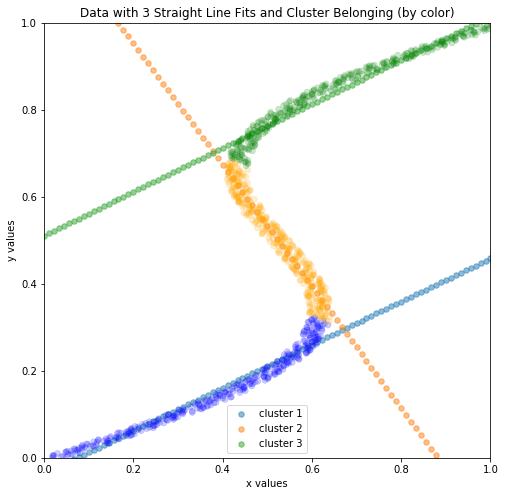

In [181]:
#plot our results
cmap = colors.ListedColormap(['blue', 'orange','green'])
plt.figure(figsize=(8, 8), facecolor='white')
plt.scatter(x1,y_first['y_pred'], marker='o', s=30, alpha=0.5, label='cluster 1')
plt.scatter(x2,y_second['y_pred'],marker='o', s=30, alpha=0.5, label='cluster 2')
plt.scatter(x3,y_third['y_pred'],marker='o', s=30, alpha=0.5, label='cluster 3')
plt.legend()
color=df_with_z['z']
bin = [-1,0,1]
#use pd.cut function can attribute the values into clustering color bin
category = pd.cut(color,bin)
color_new=pd.DataFrame(pd.Categorical(category).codes)
color_new.index=color.index
color_new
plt.scatter(df.x,df.target, lw=0.5, alpha=0.2,c=color_new[0],cmap=cmap)
plt.xlim([0,1])
plt.ylim([0,1])

plt.title("Data with 3 Straight Line Fits and Cluster Belonging (by color)")
plt.xlabel('x values')
plt.ylabel('y values')


***Just for fun, here is how it would work with neural networks (based on edited code from the link in the preface)***

In [182]:
class MDN(nn.Module):
    def __init__(self, n_hidden, n_gaussians):
        super(MDN, self).__init__()
        self.z_h = nn.Sequential(
            nn.Linear(1, n_hidden),
            
        )
        self.z_pi = nn.Linear(n_hidden, n_gaussians)
        self.z_sigma = nn.Linear(n_hidden, n_gaussians)
        self.z_mu = nn.Linear(n_hidden, n_gaussians)  

    def forward(self, x):
        z_h = self.z_h(x)
        pi = nn.functional.softmax(self.z_pi(z_h), -1)
        sigma = torch.exp(self.z_sigma(z_h))
        mu = self.z_mu(z_h)
        return pi, sigma, mu

In [183]:
oneDivSqrtTwoPI = 1.0 / np.sqrt(2.0*np.pi) # normalization factor for Gaussians
def gaussian_distribution(y, mu, sigma):
    # make |mu|=K copies of y, subtract mu, divide by sigma
    result = (y.expand_as(mu) - mu) * torch.reciprocal(sigma)
    result = -0.5 * (result * result)
    return (torch.exp(result) * torch.reciprocal(sigma)) * oneDivSqrtTwoPI

def mdn_loss_fn(pi, sigma, mu, y):
    result = gaussian_distribution(y, mu, sigma) * pi
    result = torch.sum(result, dim=1)
    result = -torch.log(result)
    return torch.mean(result)

In [184]:
network = MDN(n_hidden=20, n_gaussians=3)

In [185]:
optimizer = torch.optim.Adam(network.parameters())

In [186]:
mdn_x_data = x_data
mdn_y_data = y_data

mdn_x_tensor = x_tensor
mdn_y_tensor = y_tensor

x_variable = Variable(mdn_x_tensor)
y_variable = Variable(mdn_y_tensor, requires_grad=False)

In [187]:
def train_mdn():
    for epoch in range(10000):
        pi_variable, sigma_variable, mu_variable = network(x_variable)
        loss = mdn_loss_fn(pi_variable, sigma_variable, mu_variable, y_variable)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(epoch, loss.data)

train_mdn()


0 tensor(1.0502)
500 tensor(-1.4984)
1000 tensor(-1.6157)
1500 tensor(-1.6609)
2000 tensor(-1.6736)
2500 tensor(-1.6794)
3000 tensor(-1.6821)
3500 tensor(-1.6826)
4000 tensor(-1.6835)
4500 tensor(-1.6819)
5000 tensor(-1.6830)
5500 tensor(-1.6803)
6000 tensor(-1.6835)
6500 tensor(-1.6832)
7000 tensor(-1.6766)
7500 tensor(-1.6809)
8000 tensor(-1.6833)
8500 tensor(-1.6835)
9000 tensor(-1.6787)
9500 tensor(-1.6833)


In [188]:
pi_variable, sigma_variable, mu_variable = network(x_test_variable)

pi_data = pi_variable.data.numpy()
sigma_data = sigma_variable.data.numpy()
mu_data = mu_variable.data.numpy()


In [189]:
#I am going to define a custom color map to help illustrate cluster groupings
cmap = colors.ListedColormap(['orange', 'green','blue'])

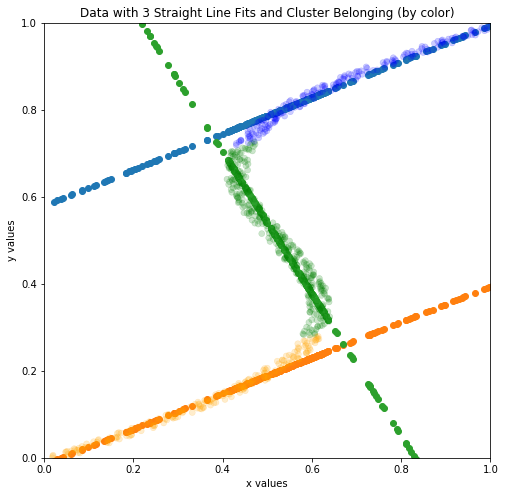

In [190]:
plt.figure(figsize=(8, 8), facecolor='white')
for mu_k, sigma_k in zip(mu_data.T, sigma_data.T): 
    plt.scatter(x_test_data, mu_k, label='straight line fits on test data' )
pi_variable1, sigma_variable1, mu_variable1 = network(x_variable)
pi_data1 = pi_variable1.data.numpy()
sigma_data1 = sigma_variable1.data.numpy()
mu_data1 = mu_variable1.data.numpy()  
color=np.sqrt((mdn_y_data-mu_data1.T[1])**2)
bin = [0,.05,.55,.9]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(color,bin)
color_new=pd.DataFrame(pd.Categorical(category).codes)
color_new.index=color.index
color_new

plt.scatter(mdn_x_data, mdn_y_data, marker='o', lw=0.5, alpha=0.2,c=color_new[0],cmap=cmap,label='original data'  )
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Data with 3 Straight Line Fits and Cluster Belonging (by color)")
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

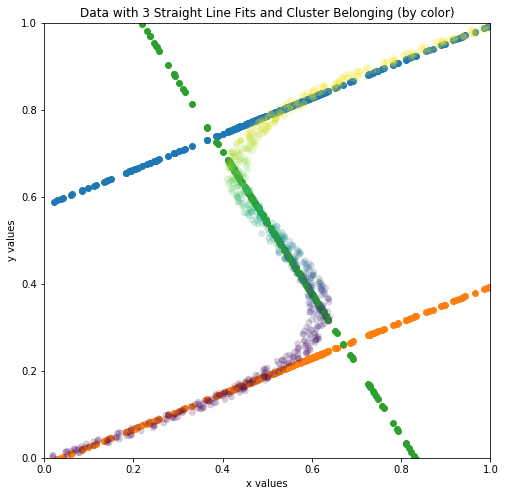

In [191]:
#Another way to make this chart with more granularity (i.e. to show how clusters transition is as follows)

plt.figure(figsize=(8, 8), facecolor='white')
for mu_k, sigma_k in zip(mu_data.T, sigma_data.T): 
    plt.scatter(x_test_data, mu_k, label='straight line fits on test data' )
pi_variable1, sigma_variable1, mu_variable1 = network(x_variable)
pi_data1 = pi_variable1.data.numpy()
sigma_data1 = sigma_variable1.data.numpy()
mu_data1 = mu_variable1.data.numpy()  
color=np.sqrt((mdn_y_data-mu_data1.T[1])**2)
plt.scatter(mdn_x_data, mdn_y_data, marker='o', lw=0.5, alpha=0.2,c=color,cmap='viridis',label='original data'  )
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Data with 3 Straight Line Fits and Cluster Belonging (by color)")
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

**Note for those who want to read more** The mixture of experts can be implemented using Expectation Maximization using iteratively-reweighted least squares. Our method in A was merely an approximation to this process. You can find update equations [here](https://people.eecs.berkeley.edu/~jordan/papers/jordan-xu.ps)

**Gratuitous Titular Reference**:  [DJs](https://martingarrix.com/), [DJs](https://www.tiesto.com/), [DJs](https://marshmellomusic.com/).

<div class="answer-separator">
------------------------
</div>